# Covid-19 Data EDA and Forecast Modeling

#### Author: Joseph Denney
#### Email: joseph.d.denney@gmail.com
#### github: www.github.com/josephdenney/Tweet_Analysis

## Introduction

### Problem and Purpose

Create easily viewable and customizable visualizations about Covid-19 and its economic impacts. Additionally, to provide a timeline for future vaccinations and an estimate for returning to normal based on rollout so far.

for my capstone i want to build a forecasting model for Covid-19 based on current hospital, infection, and death data. I will be using API html links to bring in up to date data regularly. My project will use supervised learning in the form of ARIMA through SARIMAX in order to predict future numbers.

#### supplement with daily flu data
#### explore additional data sources

Goal: Forecast Covid-19 # of Cases and Deaths 45 days into the future and provide insight about the data.
My project will use supervised learning to do this. 

## Table of Contents

### Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Custom Libraries

In [4]:
from Cust_Func import adf_test
from Cust_Func import create_ARIMA_summary as cas
from Cust_Func import build_SARIMA_verify_forecast as bsmod
from Cust_Func import build_SARIMA_verify_forecast_whole as bsmodw
from Cust_Func import create_ARIMA_summary_whole as casw

## Explore Data

### Create New DataFrame

In [5]:
df_states = pd.read_csv('https://api.covidtracking.com/v1/states/daily.csv',index_col='date',parse_dates=True)
df_whole_US = pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv',index_col='date',parse_dates=True)

In [6]:
df_states.tail().index[0:100]

DatetimeIndex(['2020-01-17', '2020-01-16', '2020-01-15', '2020-01-14',
               '2020-01-13'],
              dtype='datetime64[ns]', name='date', freq=None)

In [7]:
df_states = df_states.dropna(subset=['death'])

In [8]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17102 entries, 2021-01-16 to 2020-02-10
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        17102 non-null  object 
 1   positive                     17054 non-null  float64
 2   probableCases                7571 non-null   float64
 3   negative                     16931 non-null  float64
 4   pending                      1623 non-null   float64
 5   totalTestResultsSource       17102 non-null  object 
 6   totalTestResults             17081 non-null  float64
 7   hospitalizedCurrently        14684 non-null  float64
 8   hospitalizedCumulative       10971 non-null  float64
 9   inIcuCurrently               9431 non-null   float64
 10  inIcuCumulative              3192 non-null   float64
 11  onVentilatorCurrently        7519 non-null   float64
 12  onVentilatorCumulative       1093 non-null   float64
 13 

In [9]:
df_states['state'].unique() # list of states to iterate through

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [10]:
state_postal = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY']

### Create DataFrame for Each State Deaths

In [11]:
# create a dataframe for each state, visualize data

In [12]:
df_begin = 'df_{state}'
df_list = []

In [13]:
df_states.sort_index()

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-02-10,NJ,NaN,NaN,NaN,NaN,posNeg,0.0,NaN,NaN,NaN,...,0,0,0,04c672d9235d9aeb73fb20462d13e41ab325b456,0,0,0,0,0,NaN
2020-02-11,NJ,NaN,NaN,NaN,NaN,posNeg,0.0,NaN,NaN,NaN,...,0,0,0,c517cc2a1c11e114c74f683aa30f00b560b61652,0,0,0,0,0,NaN
2020-02-12,NJ,NaN,NaN,NaN,NaN,posNeg,0.0,NaN,NaN,NaN,...,0,0,0,dc77f570d79d1398d81a9b86c99f901f37c5e0fe,0,0,0,0,0,NaN
2020-02-13,NJ,NaN,NaN,NaN,NaN,posNeg,0.0,NaN,NaN,NaN,...,0,0,0,b0269e519c685d2937b037df7dbe4a12b325a603,0,0,0,0,0,NaN
2020-02-14,NJ,NaN,NaN,NaN,NaN,posNeg,0.0,NaN,NaN,NaN,...,0,0,0,6d74e2c9d73e5222e1819cf58d39a59dd19bffee,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-16,NE,180910.0,NaN,701962.0,NaN,totalTestsViral,1908692.0,457.0,5565.0,NaN,...,882872,19,26,027e49bed037b298ebda870603f601056137e75c,0,0,0,0,0,NaN
2021-01-16,ND,95714.0,3790.0,291581.0,NaN,totalTestEncountersViral,1301427.0,95.0,3704.0,10.0,...,387295,0,5,6f3f4409f2f1224e50913fd0305a894483105985,0,0,0,0,0,NaN
2021-01-16,NC,667826.0,64144.0,7346232.0,NaN,posNeg,8014058.0,3895.0,NaN,880.0,...,8014058,83,0,f1861cf01243e2414c3972c598e0ec7c96f2c45a,0,0,0,0,0,NaN


In [14]:
df_states[df_states['state']=='AK']

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2021-01-16,AK,50017.0,NaN,1348632.0,NaN,totalTestsViral,1398649.0,67.0,1152.0,NaN,...,1398649,0,0,c8702a5885696c80f7ada7729246c5e8a7e80190,0,0,0,0,0,NaN
2021-01-15,AK,49835.0,NaN,1339391.0,NaN,totalTestsViral,1389226.0,77.0,1152.0,NaN,...,1389226,1,3,0d6d7a509fe581dba7c140188ff4c9016f79482c,0,0,0,0,0,NaN
2021-01-14,AK,49535.0,NaN,1332741.0,NaN,totalTestsViral,1382276.0,81.0,1149.0,NaN,...,1382276,2,11,f08e8447cec243fb32dc82e10a835d6614220f8d,0,0,0,0,0,NaN
2021-01-13,AK,49203.0,NaN,1321632.0,NaN,totalTestsViral,1370835.0,68.0,1138.0,NaN,...,1370835,2,34,c539733f6fd3701c417790f59c2259ce82b2ec76,0,0,0,0,0,NaN
2021-01-12,AK,48797.0,NaN,1308911.0,NaN,totalTestsViral,1357708.0,79.0,1104.0,NaN,...,1357708,0,0,1de50bd029c3c58bca4c4fdf884f584c7f61e35d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10,AK,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,1.0,NaN,...,23,0,0,3dc91f117f02b4ceb2740f1b7a0f50fe7f7a67e7,0,0,0,0,0,NaN
2020-03-09,AK,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,1.0,NaN,...,23,0,1,d079fbd221af733f452c4c09a96059c1b7403d68,0,0,0,0,0,NaN
2020-03-08,AK,NaN,NaN,14.0,6.0,totalTestsViral,14.0,NaN,NaN,NaN,...,14,0,0,ec0512b5cc8703196f5901589feb0640e43a851a,0,0,0,0,0,NaN


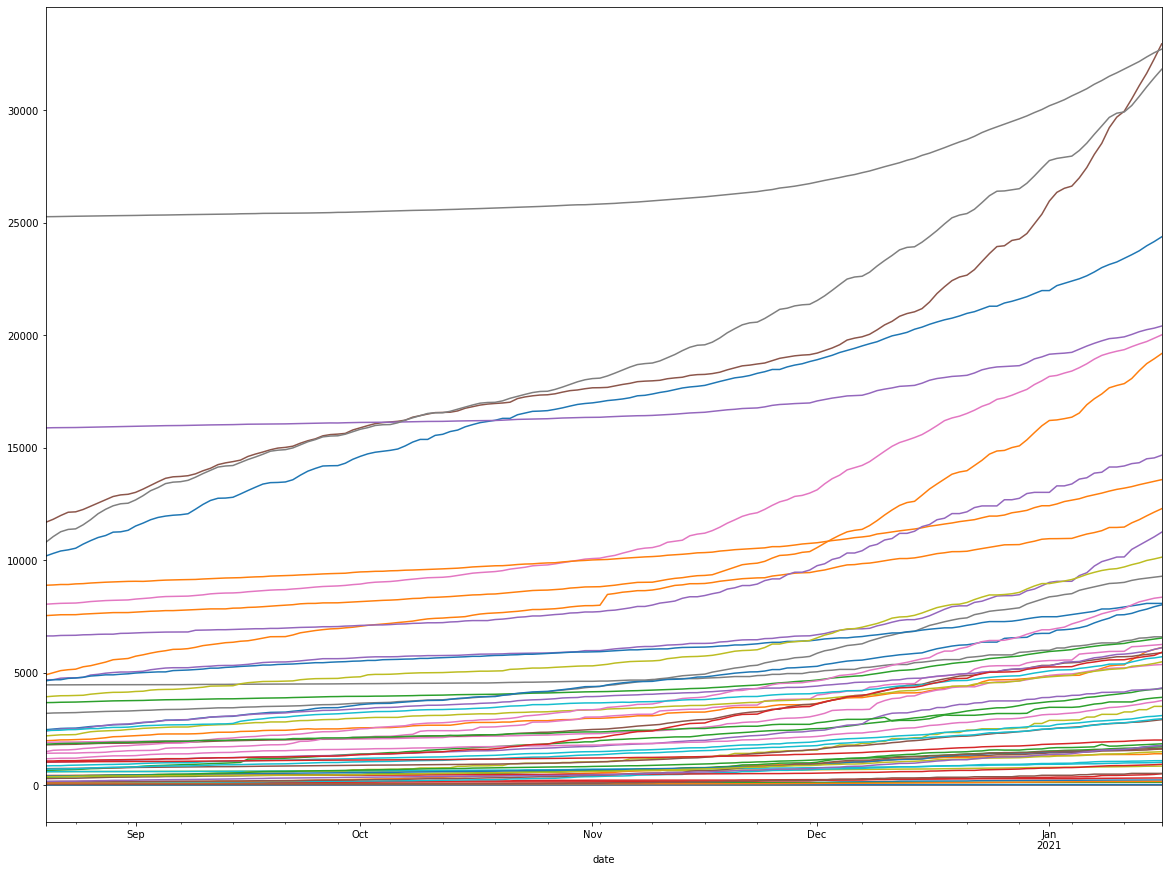

In [15]:
for state in state_postal:
    df_individual = df_states[df_states['state']==state]
    df_individual['death'].iloc[:150].plot(figsize=(20,15))

In [16]:
df_list = [] # list of state dataframes

In [17]:
for state in state_postal:
    print(df_states[df_states['state']==state]) # awesome, now I'm printing each state df one at a time
    df_list.append(df_states[df_states['state']==state])

           state  positive  probableCases   negative  pending  \
date                                                            
2021-01-16    AK   50017.0            NaN  1348632.0      NaN   
2021-01-15    AK   49835.0            NaN  1339391.0      NaN   
2021-01-14    AK   49535.0            NaN  1332741.0      NaN   
2021-01-13    AK   49203.0            NaN  1321632.0      NaN   
2021-01-12    AK   48797.0            NaN  1308911.0      NaN   
...          ...       ...            ...        ...      ...   
2020-03-10    AK       NaN            NaN       23.0      9.0   
2020-03-09    AK       NaN            NaN       23.0      9.0   
2020-03-08    AK       NaN            NaN       14.0      6.0   
2020-03-07    AK       NaN            NaN       12.0      2.0   
2020-03-06    AK       NaN            NaN        8.0      1.0   

           totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
date                                                                        

           state  positive  probableCases   negative  pending  \
date                                                            
2021-01-16    GA  674994.0            NaN  5212706.0      NaN   
2021-01-15    GA  668068.0            NaN  5175953.0      NaN   
2021-01-14    GA  660720.0            NaN  5140287.0      NaN   
2021-01-13    GA  654356.0            NaN  5109618.0      NaN   
2021-01-12    GA  648694.0            NaN  5089168.0      NaN   
...          ...       ...            ...        ...      ...   
2020-03-17    GA     146.0            NaN        NaN      NaN   
2020-03-16    GA     121.0            NaN        NaN      NaN   
2020-03-15    GA      99.0            NaN        NaN      NaN   
2020-03-14    GA      66.0            NaN        NaN      NaN   
2020-03-13    GA      42.0            NaN        NaN      NaN   

           totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
date                                                                        

           state  positive  probableCases   negative  pending  \
date                                                            
2021-01-16    MI  581785.0        46251.0  8225829.0      NaN   
2021-01-15    MI  579574.0        45972.0  8177683.0      NaN   
2021-01-14    MI  576573.0        45569.0  8138266.0      NaN   
2021-01-13    MI  573278.0        44972.0  8092393.0      NaN   
2021-01-12    MI  570150.0        44538.0  8053893.0      NaN   
...          ...       ...            ...        ...      ...   
2020-03-21    MI    7023.0           85.0     4086.0      NaN   
2020-03-20    MI    6219.0           69.0     3041.0      NaN   
2020-03-19    MI    5276.0           55.0     2051.0      NaN   
2020-03-18    MI    4531.0           40.0     1478.0      NaN   
2020-03-17    MI    3659.0           27.0      879.0      NaN   

           totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
date                                                                        

[318 rows x 54 columns]
           state   positive  probableCases    negative  pending  \
date                                                              
2021-01-16    NY  1219548.0            NaN  27513443.0      NaN   
2021-01-15    NY  1203550.0            NaN  27252155.0      NaN   
2021-01-14    NY  1183608.0            NaN  26947426.0      NaN   
2021-01-13    NY  1169947.0            NaN  26748498.0      NaN   
2021-01-12    NY  1155370.0            NaN  26566207.0      NaN   
...          ...        ...            ...         ...      ...   
2020-03-19    NY     4152.0            NaN     18361.0      NaN   
2020-03-18    NY     2383.0            NaN     12432.0      NaN   
2020-03-17    NY     1374.0            NaN      8888.0      NaN   
2020-03-16    NY      942.0            NaN      6413.0      NaN   
2020-03-15    NY      648.0            NaN      4771.0      NaN   

              totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
date                   

[308 rows x 54 columns]
           state  positive  probableCases  negative  pending  \
date                                                           
2021-01-16    VI    2166.0            NaN   35759.0     94.0   
2021-01-15    VI    2166.0            NaN   35759.0     94.0   
2021-01-14    VI    2166.0            NaN   35759.0     94.0   
2021-01-13    VI    2166.0            NaN   35759.0     94.0   
2021-01-12    VI    2166.0            NaN   35759.0     94.0   
...          ...       ...            ...       ...      ...   
2020-04-09    VI      46.0            NaN     251.0     42.0   
2020-04-08    VI      45.0            NaN     242.0     35.0   
2020-04-07    VI      43.0            NaN     222.0     20.0   
2020-04-06    VI      43.0            NaN     222.0     20.0   
2020-04-05    VI      42.0            NaN     206.0     18.0   

           totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
date                                                             

In [18]:
# # def create_dataframe_list():
    
# #     for state in state_postal:
# #         df_list.append(df_begin.format(state=state))
            
# df_states[df_states['state']==state])
    
# def create_dataframes(): 
#     for state in state_postal:
#         state = pd.Dataframe(df_states[df_states['state']==state])
    
# # for df in df_list:
# #     print(df)
# #     df = df_states[df_states['state']==state]
# # #     df.plot(figsize=(20,5));

In [19]:
df_AK = df_states[df_states['state']=='AK'] # let's just use Alaska for now

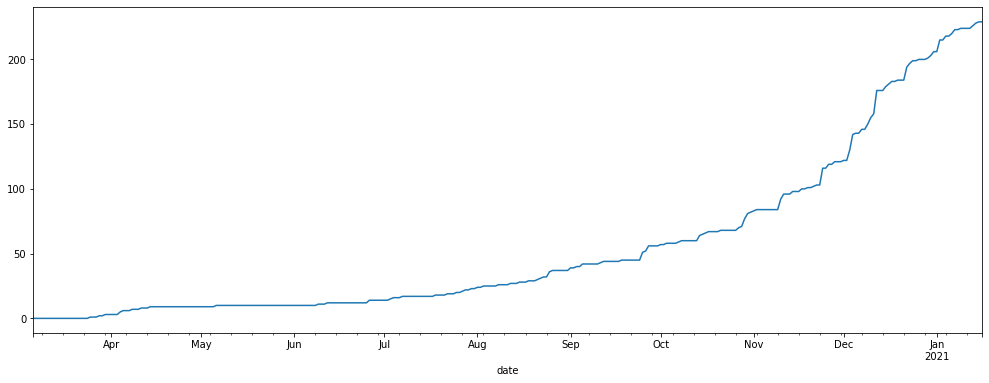

In [20]:
df_AK['death'].plot(figsize=(17,6));

### Hospital Bed and ICU Bed Data

In [21]:
# import requests

# url = "https://api.covid19api.com/all"

# payload = {}
# headers= {}

# response = requests.request("GET", url, headers=headers, d= payload)

# print(response.text.encode('utf8'))

In [22]:
df_bed = pd.read_csv('Data/reference_hospitalization_all_locs.csv',index_col='date',parse_dates=True)

df_bed.tail()

,location_id,V1,location_name,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,...,est_infections_mean_p100k_rate,est_infections_lower_p100k_rate,est_infections_upper_p100k_rate,inf_cuml_mean,inf_cuml_upper,inf_cuml_lower,seroprev_mean,seroprev_upper,seroprev_lower,seroprev_data_type
date,,,,,,,,,,,,,,,,,,,,,
2021-03-28,60899,46949,Europe and Central Asia,265653.263253,164706.468520,341795.449905,35289.381461,23023.341323,45102.601640,17828.079768,...,NaN,NaN,NaN,1.717856e+08,1.927082e+08,1.504993e+08,NaN,NaN,NaN,NaN
2021-03-29,60899,46950,Europe and Central Asia,259712.192849,157779.681341,336098.388467,34479.702275,22091.482538,44282.273909,17414.672363,...,NaN,NaN,NaN,1.721117e+08,1.931445e+08,1.506805e+08,NaN,NaN,NaN,NaN
2021-03-30,60899,46951,Europe and Central Asia,253812.286545,151151.568820,330308.037537,33675.817103,21219.554344,43385.733833,17004.357986,...,NaN,NaN,NaN,1.724290e+08,1.935697e+08,1.508554e+08,NaN,NaN,NaN,NaN
2021-03-31,60899,46952,Europe and Central Asia,247951.449702,145534.000211,324495.161851,32877.877387,20421.770898,42609.319496,16597.235006,...,NaN,NaN,NaN,1.727376e+08,1.939841e+08,1.510242e+08,NaN,NaN,NaN,NaN
2021-04-01,60899,46953,Europe and Central Asia,242132.408547,139973.774694,317574.415868,32085.996051,19594.471039,41728.913432,16193.294588,...,NaN,NaN,NaN,1.730377e+08,1.943883e+08,1.511876e+08,NaN,NaN,NaN,NaN


In [23]:
df_bed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165633 entries, 2020-02-04 to 2021-04-01
Data columns (total 72 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   location_id                       165633 non-null  int64  
 1   V1                                165633 non-null  int64  
 2   location_name                     165633 non-null  object 
 3   allbed_mean                       165633 non-null  float64
 4   allbed_lower                      165633 non-null  float64
 5   allbed_upper                      165633 non-null  float64
 6   ICUbed_mean                       165633 non-null  float64
 7   ICUbed_lower                      165633 non-null  float64
 8   ICUbed_upper                      165633 non-null  float64
 9   InvVen_mean                       165633 non-null  float64
 10  InvVen_lower                      165633 non-null  float64
 11  InvVen_upper                      16

In [24]:
df_bed = df_bed.dropna(subset=['deaths_mean'])

In [25]:
df_bed.columns

Index(['location_id', 'V1', 'location_name', 'allbed_mean', 'allbed_lower',
       'allbed_upper', 'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper',
       'InvVen_mean', 'InvVen_lower', 'InvVen_upper', 'admis_mean',
       'admis_lower', 'admis_upper', 'newICU_mean', 'newICU_lower',
       'newICU_upper', 'bedover_mean', 'bedover_lower', 'bedover_upper',
       'icuover_mean', 'icuover_lower', 'icuover_upper', 'hosp_data_type',
       'deaths_data_type', 'deaths_mean', 'deaths_lower', 'deaths_upper',
       'totdea_mean', 'totdea_lower', 'totdea_upper', 'deaths_mean_smoothed',
       'deaths_lower_smoothed', 'deaths_upper_smoothed',
       'totdea_mean_smoothed', 'totdea_lower_smoothed',
       'totdea_upper_smoothed', 'mobility_data_type', 'mobility_composite',
       'total_tests_data_type', 'total_tests',
       'confirmed_infections_data_type', 'confirmed_infections',
       'est_infections_data_type', 'est_infections_mean',
       'est_infections_lower', 'est_infections_upper', 'tot

In [26]:
df_bed['location_name'].unique()

array(['Global', 'China', 'Taiwan (Province of China)', 'Indonesia',
       'Malaysia', 'Maldives', 'Myanmar', 'Philippines', 'Sri Lanka',
       'Thailand', 'Viet Nam', 'Armenia', 'Azerbaijan', 'Georgia',
       'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Uzbekistan', 'Albania',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Hungary', 'North Macedonia', 'Montenegro', 'Poland', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Belarus', 'Estonia', 'Latvia',
       'Lithuania', 'Republic of Moldova', 'Russian Federation',
       'Ukraine', 'Japan', 'Republic of Korea', 'Singapore', 'Australia',
       'New Zealand', 'Andorra', 'Austria', 'Belgium', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'Argentina', 'Chile', 'Uruguay', 'Canada',
       'United States of Am

### Filter for USA and Global Data

In [27]:
df_USA = df_bed[df_bed['location_name']=='United States of America']
df_USA = df_USA.filter(regex='mean',axis=1) 

In [28]:
df_global = df_bed[df_bed['location_name']=='Global']
df_global = df_global.filter(regex='mean',axis=1) 

In [29]:
df_USA.columns

Index(['allbed_mean', 'ICUbed_mean', 'InvVen_mean', 'admis_mean',
       'newICU_mean', 'bedover_mean', 'icuover_mean', 'deaths_mean',
       'totdea_mean', 'deaths_mean_smoothed', 'totdea_mean_smoothed',
       'est_infections_mean', 'deaths_mean_p100k_rate',
       'totdea_mean_p100k_rate', 'deaths_mean_smoothed_p100k_rate',
       'totdea_mean_smoothed_p100k_rate', 'est_infections_mean_p100k_rate',
       'inf_cuml_mean', 'seroprev_mean'],
      dtype='object')

In [30]:
df_USA.head()
len(df_USA)

423

In [31]:
# let's look at multiple statistics 

In [32]:
stats = ['allbed_mean', 'ICUbed_mean', 'InvVen_mean', 'admis_mean',
       'newICU_mean', 'bedover_mean', 'icuover_mean', 'deaths_mean',
       'totdea_mean', 'deaths_mean_smoothed', 'totdea_mean_smoothed',
       'est_infections_mean', 'deaths_mean_p100k_rate', 
       'est_infections_mean_p100k_rate', 'seroprev_mean']

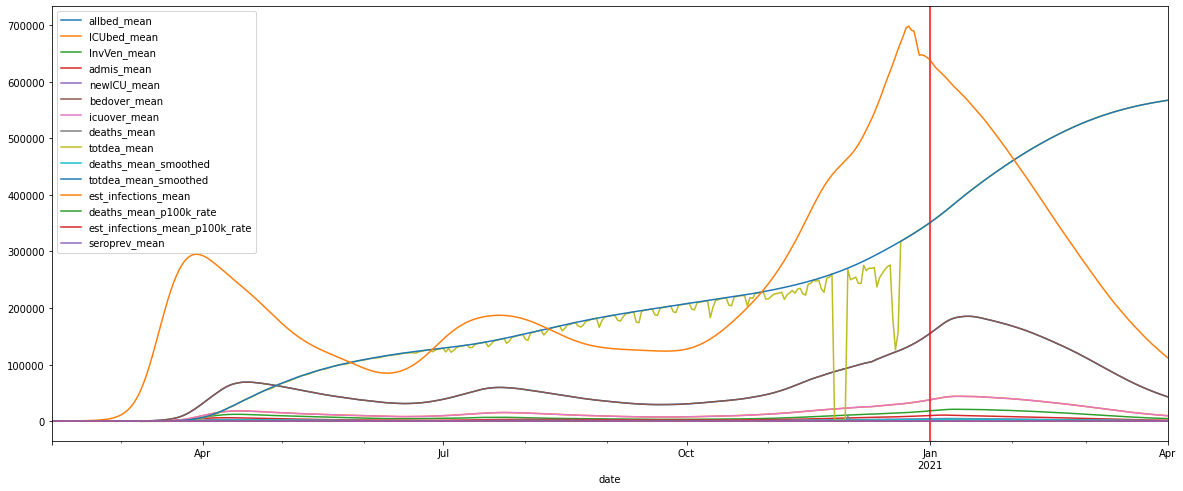

In [33]:
for i in stats:
    ax = df_USA[i].plot(legend=True,figsize=(20,8));
    ax.axvline(x='2021-01-01',color='r',alpha=.1);

allbed_mean
ICUbed_mean
InvVen_mean
admis_mean
newICU_mean
bedover_mean
icuover_mean
deaths_mean
totdea_mean
deaths_mean_smoothed
totdea_mean_smoothed
est_infections_mean
deaths_mean_p100k_rate
est_infections_mean_p100k_rate
seroprev_mean


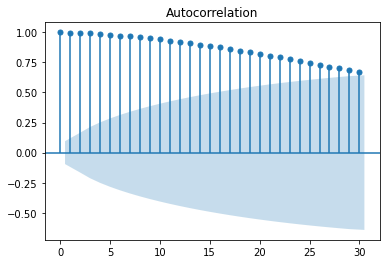

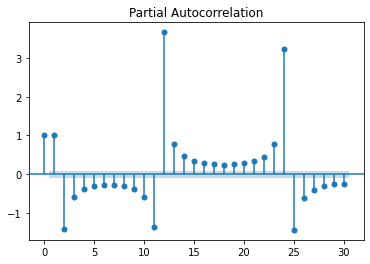

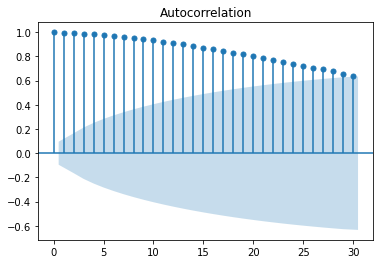

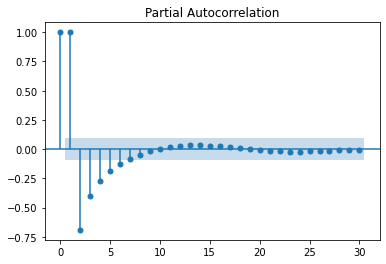

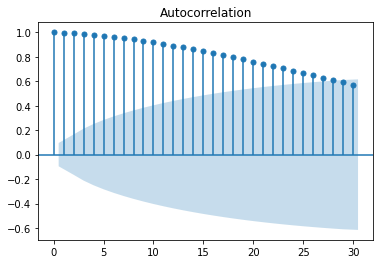

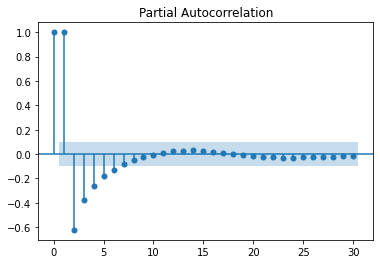

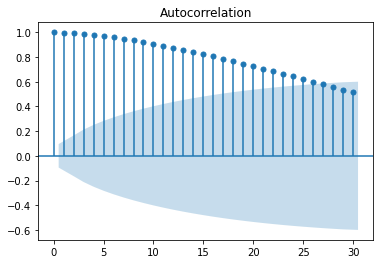

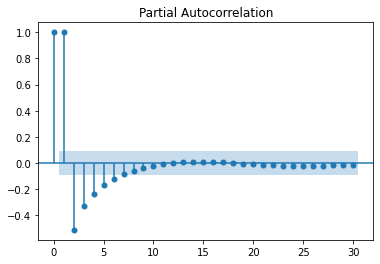

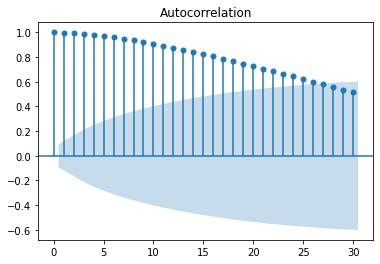

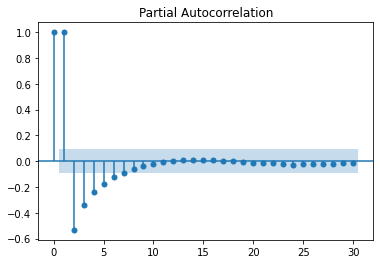

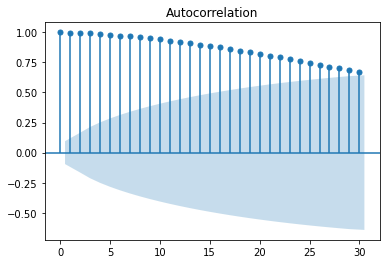

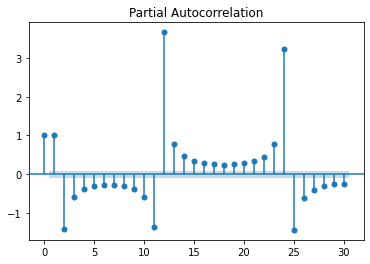

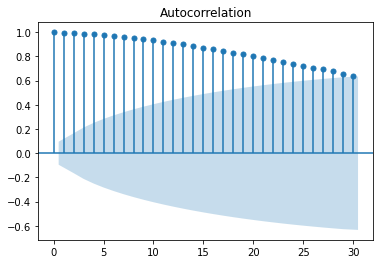

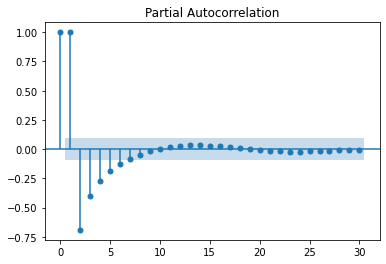

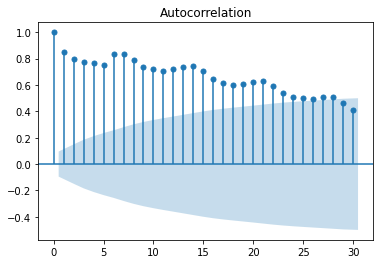

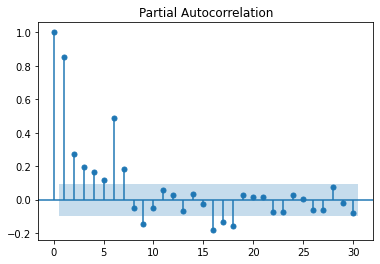

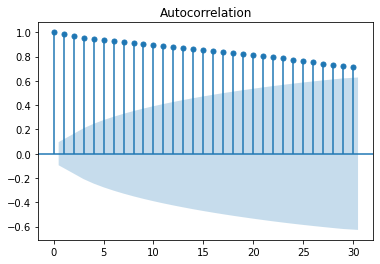

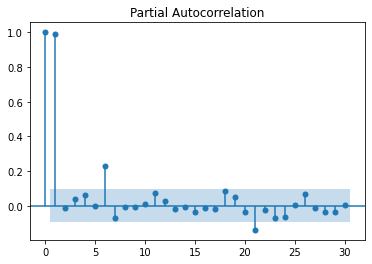

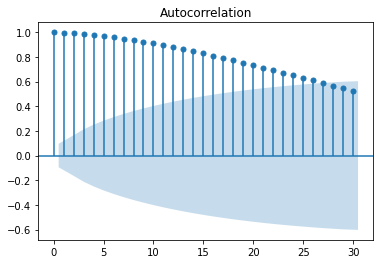

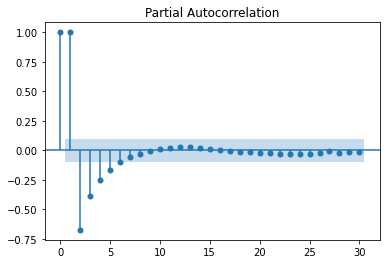

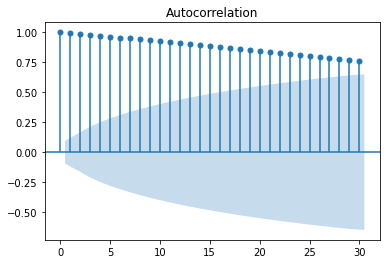

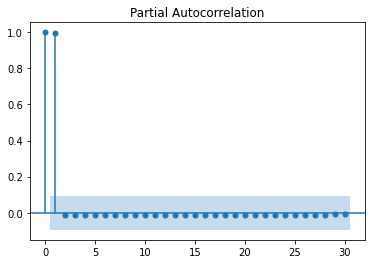

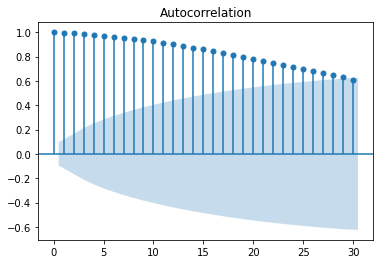

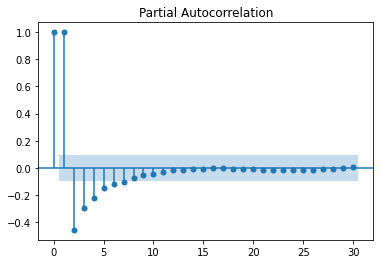

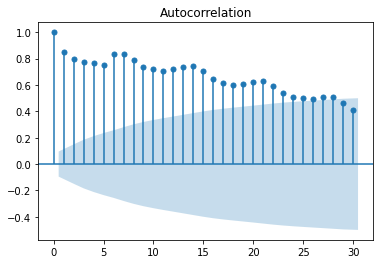

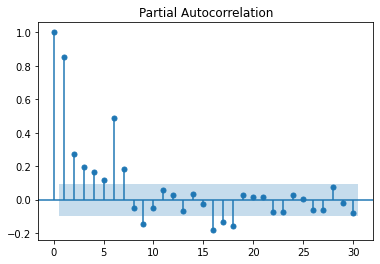

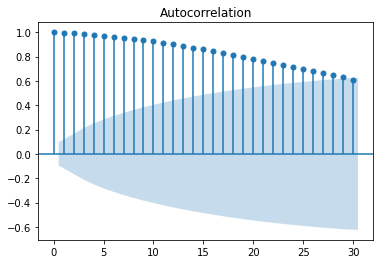

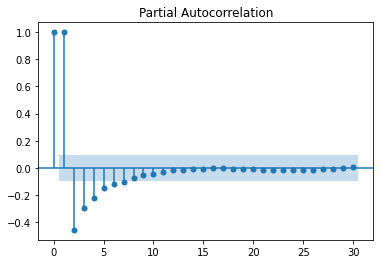

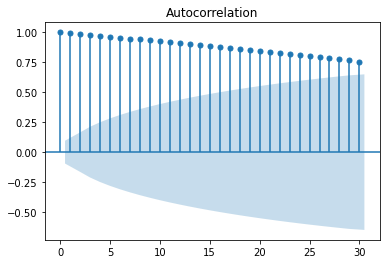

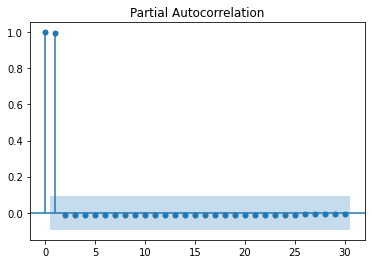

In [34]:
for i in stats:
    print(i)
    plot_acf(df_USA[i],lags=30);
    plot_pacf(df_USA[i],lags=30);

In [35]:
from IPython.display import IFrame
IFrame("Data/IHME_COVID_19_Data_Release_Information_Sheet.pdf", width=1000, height=600)

In [36]:
# important metrics 
'allbed_mean' # total beds with a covid patient 
'ICUbed_mean' # ICU beds with a covid patient
'InvVen_mean' # ventilators supporting a covid patient
'newICU_mean' # mean number of new people in ICU
'icuover_mean' # covid ICU beds needed less available ICU capacity
'deaths_mean' # mean daily deaths

'deaths_mean'

In [37]:
graph_list = ['allbed_mean', 'ICUbed_mean', 'InvVen_mean', 'newICU_mean', 'icuover_mean', 'deaths_mean']

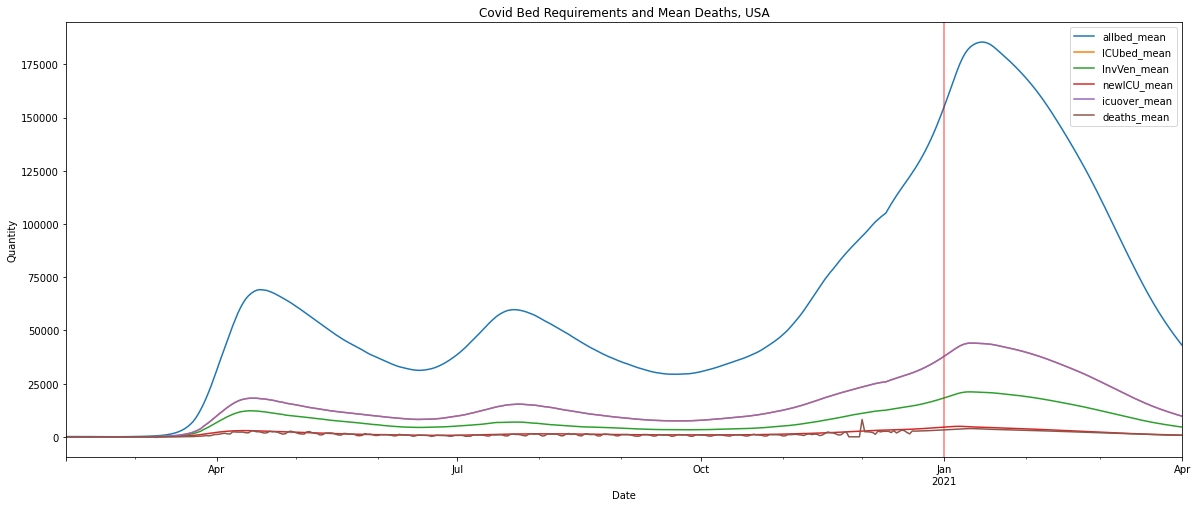

In [38]:
for i in graph_list:
    ax = df_USA[i].plot(legend=True,figsize=(20,8), title='Covid Bed Requirements and Mean Deaths, USA',
                   ylabel='Quantity',xlabel='Date')
    ax.axvline(x='2021-01-01',color='r',alpha=.1);

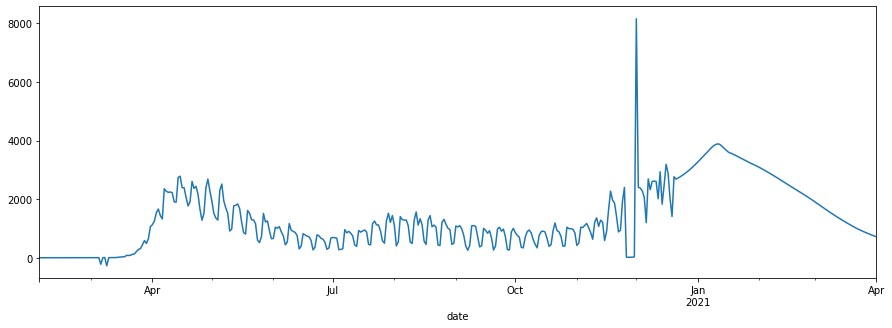

In [39]:
df_USA['deaths_mean'].plot(figsize=(15,5)); # take moving average and reinsert to DF

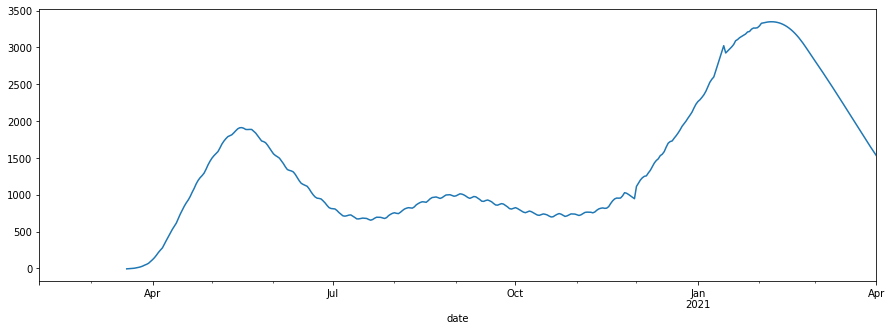

In [40]:
df_USA.rolling(window=45).mean()['deaths_mean'].plot(figsize=(15,5));

In [41]:
df_USA['rolling mean'] = df_USA.rolling(window=45).mean()['deaths_mean']

## Models

### Auto Regression Model

In [42]:
from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

### USA

In [43]:
len(df_USA)

423

In [44]:
dfs = [df_USA, df_global]

In [45]:
df_USA.index # dailymeasurements in USA over the course of the year, 247 days
# we want to model out 45 days, so we will make a train/test split at 45

DatetimeIndex(['2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13',
               ...
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30',
               '2021-03-31', '2021-04-01'],
              dtype='datetime64[ns]', name='date', length=423, freq=None)

In [46]:
len(df_global.index) # global has multiple entries per day.

661

In [47]:
train = df_USA.iloc[:len(df_USA)-45]
test = df_USA.iloc[len(df_USA)-45:]

In [48]:
target = 'allbed_mean'

In [49]:
adf_test(df_USA['allbed_mean']) # non-stationary, run auto_arima

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.785073
p-value                   0.060438
# lags used              15.000000
# observations          407.000000
critical value (1%)      -3.446520
critical value (5%)      -2.868668
critical value (10%)     -2.570567 



Fail to reject the null hypothesis 

Data has a unit root and is non-stationary


### Alaska SARIMA Model

In [50]:
df_AK = df_AK.sort_index()

In [51]:
df_AK = df_AK.dropna(subset=['death'])

In [52]:
df_alaska = pd.DataFrame(df_AK)

In [53]:
print(df_alaska.index.min())
print(df_alaska.index.max())
print('Length of dataframe: ' , len(df_alaska))

2020-03-06 00:00:00
2021-01-16 00:00:00
Length of dataframe:  317


In [54]:
stepwise_fit = auto_arima(df_alaska['death'],start_p=0,start_q=0,max_p=6,max_q=5, seasonal=True)

In [55]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  317
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -635.310
Date:                Sat, 16 Jan 2021   AIC                           1274.620
Time:                        19:20:45   BIC                           1282.125
Sample:                             0   HQIC                          1277.618
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9496      0.014    -66.495      0.000      -0.978      -0.922
sigma2         3.2820      0.096     34.059      0.000       3.093       3.471
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             11671.55
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              73.62   Skew:                             4.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
length = len(df_alaska)-45

In [57]:
train_data = df_alaska.iloc[:length]
test_data = df_alaska.iloc[length:]

In [58]:
train_data

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-03-06,AK,NaN,NaN,8.0,1.0,totalTestsViral,8.0,NaN,NaN,NaN,...,8,0,0,1cccb785fe70d960475d4b202a3d0fc678c81e41,0,0,0,0,0,NaN
2020-03-07,AK,NaN,NaN,12.0,2.0,totalTestsViral,12.0,NaN,NaN,NaN,...,12,0,0,a2776acac3d2b1dea060a3c20f4b508d5c00fd3d,0,0,0,0,0,NaN
2020-03-08,AK,NaN,NaN,14.0,6.0,totalTestsViral,14.0,NaN,NaN,NaN,...,14,0,0,ec0512b5cc8703196f5901589feb0640e43a851a,0,0,0,0,0,NaN
2020-03-09,AK,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,1.0,NaN,...,23,0,1,d079fbd221af733f452c4c09a96059c1b7403d68,0,0,0,0,0,NaN
2020-03-10,AK,NaN,NaN,23.0,9.0,totalTestsViral,23.0,NaN,1.0,NaN,...,23,0,0,3dc91f117f02b4ceb2740f1b7a0f50fe7f7a67e7,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,AK,30204.0,NaN,968850.0,NaN,totalTestsViral,999054.0,155.0,721.0,NaN,...,999054,2,30,c35ffd2c3ae364622c7e66eb8b7fc2336d93b353,0,0,0,0,0,NaN
2020-11-29,AK,30816.0,NaN,975364.0,NaN,totalTestsViral,1006180.0,159.0,722.0,NaN,...,1006180,0,1,81a1922227c01f54d1d8cc7e718af55ee8b6804b,0,0,0,0,0,NaN
2020-11-30,AK,31323.0,NaN,980073.0,NaN,totalTestsViral,1011396.0,162.0,725.0,NaN,...,1011396,0,3,271d3c383c856d19d56e16fbd4efca0f728d6f5a,0,0,0,0,0,NaN


In [59]:
test_data

,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-12-03,AK,33291.0,NaN,1007214.0,NaN,totalTestsViral,1040505.0,157.0,783.0,NaN,...,1040505,8,15,2681286b4959bcec2a503789d53119c645f4b0c6,0,0,0,0,0,NaN
2020-12-04,AK,34041.0,NaN,1016328.0,NaN,totalTestsViral,1050369.0,151.0,794.0,NaN,...,1050369,12,11,e26ffb8603f9420d79be27ffffa4aff3ba2b2c2d,0,0,0,0,0,NaN
2020-12-05,AK,34963.0,NaN,1032268.0,NaN,totalTestsViral,1067231.0,166.0,799.0,NaN,...,1067231,1,5,d8b27967afb185d8e4f38f5209d713ef23065d88,0,0,0,0,0,NaN
2020-12-06,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,NaN,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
2020-12-07,AK,36196.0,NaN,1045944.0,NaN,totalTestsViral,1082140.0,166.0,805.0,NaN,...,1082140,3,6,76febf2618a346518b43da2fa5bbd7591a608060,0,0,0,0,0,NaN
2020-12-08,AK,36758.0,NaN,1052220.0,NaN,totalTestsViral,1088978.0,159.0,827.0,NaN,...,1088978,0,22,332692318da328d0239cf8586792c45a6c837366,0,0,0,0,0,NaN
2020-12-09,AK,37342.0,NaN,1062213.0,NaN,totalTestsViral,1099555.0,165.0,847.0,NaN,...,1099555,4,20,1ff1db7b83dd9155a28a2e3687fbbb65d619643e,0,0,0,0,0,NaN
2020-12-10,AK,37962.0,NaN,1075398.0,NaN,totalTestsViral,1113360.0,164.0,860.0,NaN,...,1113360,5,13,68dbda152af1d2b3fbf2d86cea850202c1cb9c81,0,0,0,0,0,NaN
2020-12-11,AK,38584.0,NaN,1084961.0,NaN,totalTestsViral,1123545.0,146.0,869.0,NaN,...,1123545,3,9,47f2cb8f9f01019549b85b0450c8c42c15bb3e77,0,0,0,0,0,NaN


In [60]:
model = sm.tsa.statespace.SARIMAX(train_data['death'],trend='ct', order=(0,2,1))
res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  death   No. Observations:                  272
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -450.220
Date:                Sat, 16 Jan 2021   AIC                            908.439
Time:                        19:20:45   BIC                            922.833
Sample:                    03-06-2020   HQIC                           914.219
                         - 12-02-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0122      0.092     -0.133      0.894      -0.192       0.167
drift       8.172e-05      0.000      0.183      0.855      -0.001       0.001
ma.L1         -0.7567      0.035    -21.696      0.0

In [61]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [62]:
predictions_AK = res.predict(start,end,typ='endogenous').rename('SARIMAX(0,2,1) Predictions')

In [63]:
train_data.index

DatetimeIndex(['2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', name='date', length=272, freq=None)

In [64]:
test_data.index

DatetimeIndex(['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06',
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16'],
              dtype='datetime64[ns]', name='date', freq=None)

In [65]:
predictions_AK = pd.DataFrame(predictions_AK)

In [66]:
predictions_AK.index.name = 'date'

#### Compare Test Data with Predictions

In [67]:
train_data.index.freq = 'D'
test_data.index.freq = 'D' # -1D is reverse index, ie most recent date is at top of dataframe
# perform sort_index on dataframe to correct. set frequencies to match for plotting
# on same visualization

In [68]:
pd.DataFrame(test_data['death']).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2020-12-03 to 2021-01-16
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   death   45 non-null     float64
dtypes: float64(1)
memory usage: 720.0 bytes


In [69]:
predictions_AK.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2020-12-03 to 2021-01-16
Freq: D
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SARIMAX(0,2,1) Predictions  45 non-null     float64
dtypes: float64(1)
memory usage: 720.0 bytes


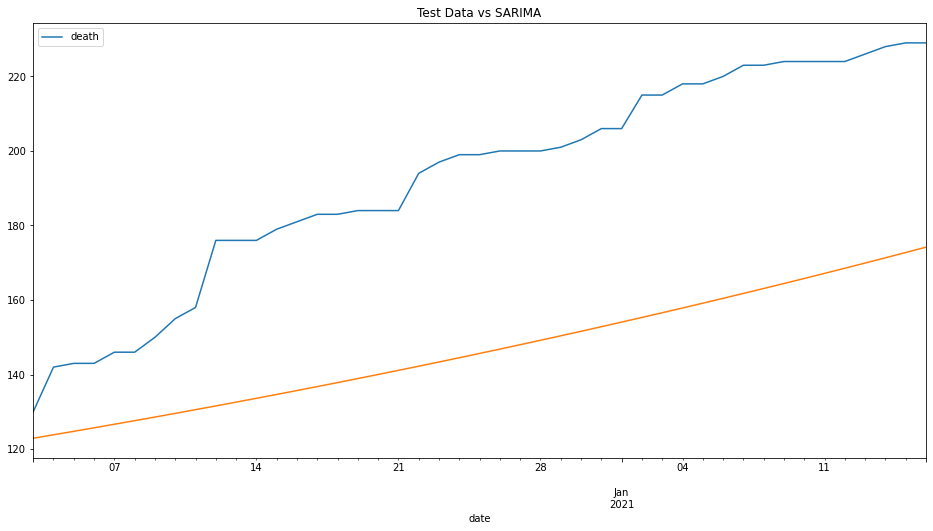

In [70]:
pd.DataFrame(test_data['death']).plot(figsize=(16,8),legend=True,title='Test Data vs SARIMA')
plt.plot(pd.DataFrame(predictions_AK))
plt.show()

In [71]:
model = sm.tsa.statespace.SARIMAX(df_alaska['death'],trend='ct', order=(0,2,1))
res = model.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  death   No. Observations:                  317
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -655.529
Date:                Sat, 16 Jan 2021   AIC                           1319.059
Time:                        19:20:46   BIC                           1334.069
Sample:                    03-06-2020   HQIC                          1325.056
                         - 01-16-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0202      0.246      0.082      0.934      -0.462       0.503
drift      -9.768e-05      0.001     -0.102      0.919      -0.002       0.002
ma.L1         -0.6963      0.031    -22.662      0.0

In [72]:
fcast = res.predict(start=len(df_AK),end=len(df_AK)+45, typ='endogenous').rename('SARIMAX FORECAST')

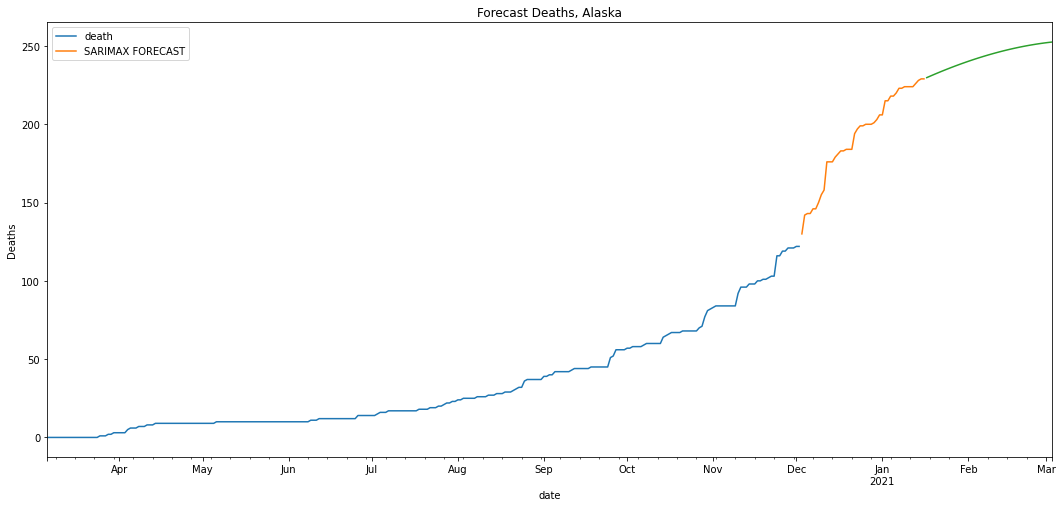

In [73]:
ax = train_data['death'].plot(figsize=(16,8),legend=True,ylabel='Deaths',title='Forecast Deaths, Alaska');
test_data['death'].plot()
fcast.plot(legend=True,figsize=(18,8)); 

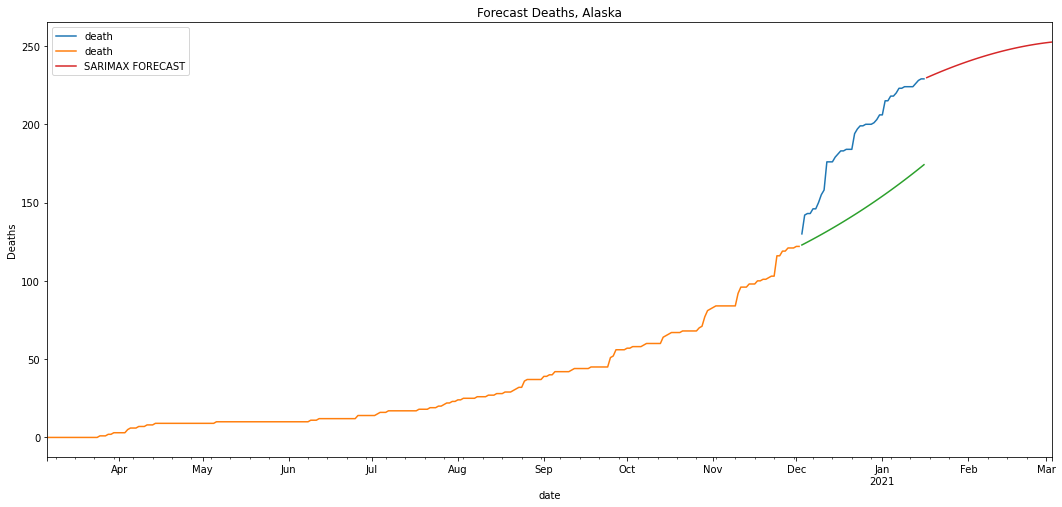

In [74]:
ax = test_data['death'].plot(figsize=(16,8),legend=True,title='Forecast Deaths, Alaska');
train_data['death'].plot(figsize=(16,8),legend=True,ylabel='Deaths');
plt.plot(predictions_AK) # 'FORECAST' FROM END OF TRAINING DATA
fcast.plot(legend=True,figsize=(18,8)); # SARIMA FORECAST

### Repeatable 45 Day Forecast by State

#### Texas

In [75]:
cas(df_states,'TX') # should print summary and return arima order as variable 'arima_order'

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  306
Model:               SARIMAX(6, 2, 0)   Log Likelihood               -1649.933
Date:                Sat, 16 Jan 2021   AIC                           3315.867
Time:                        19:20:49   BIC                           3345.603
Sample:                             0   HQIC                          3327.762
                                - 306                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.0067      4.006      1.250      0.211      -2.845      12.858
ar.L1         -0.6259      0.025    -25.508      0.000      -0.674      -0.578
ar.L2         -0.6116      0.037    -16.341      0.0

(6, 2, 0)

In [76]:
arima_order = (6,2,0)

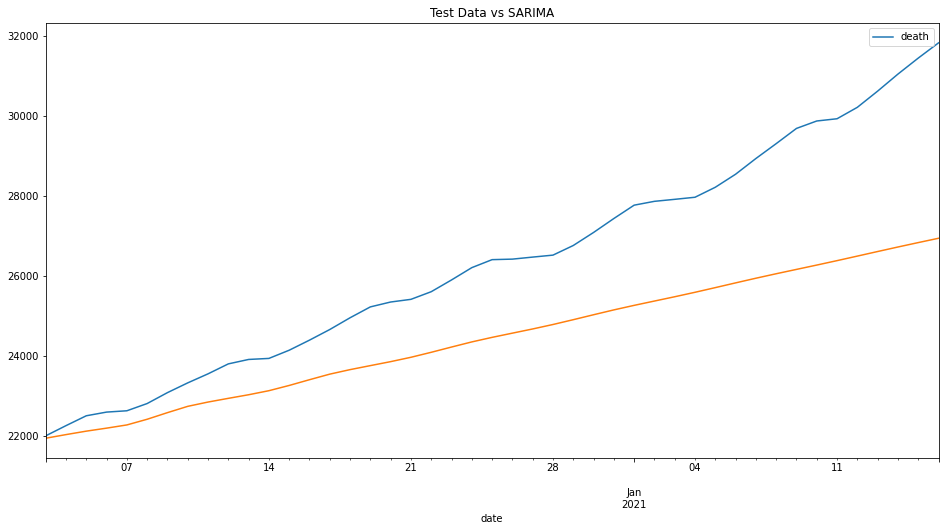

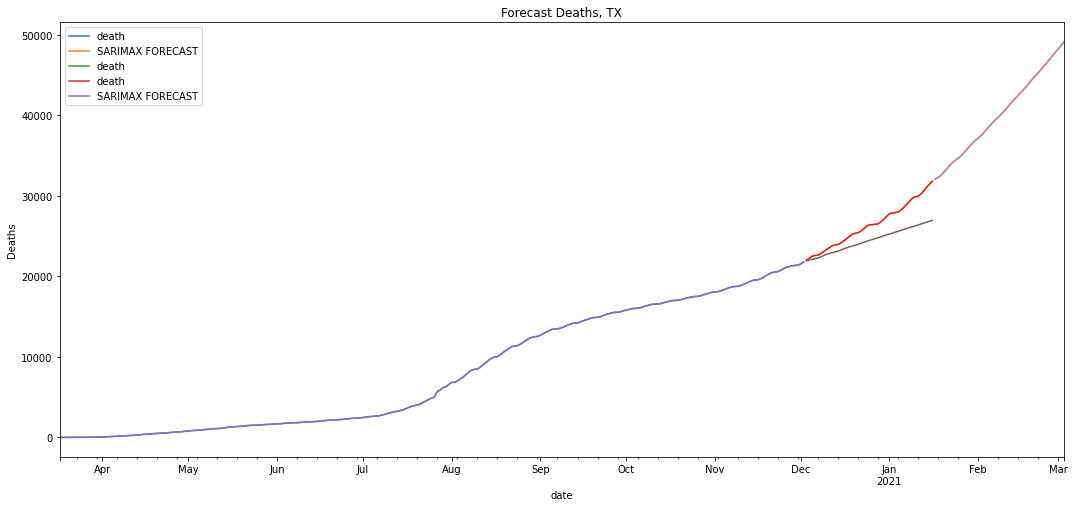

In [77]:
bsmod(df_states,'TX',arima_order)

#### Florida

In [78]:
cas(df_states,'FL')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  312
Model:               SARIMAX(6, 2, 0)   Log Likelihood               -1536.637
Date:                Sat, 16 Jan 2021   AIC                           3089.274
Time:                        19:20:54   BIC                           3119.167
Sample:                             0   HQIC                          3101.224
                                - 312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.1256      2.035      1.536      0.125      -0.864       7.115
ar.L1         -0.7906      0.036    -21.789      0.000      -0.862      -0.720
ar.L2         -0.7704      0.038    -20.540      0.0

(6, 2, 0)

In [79]:
arima_order = (6,2,0)

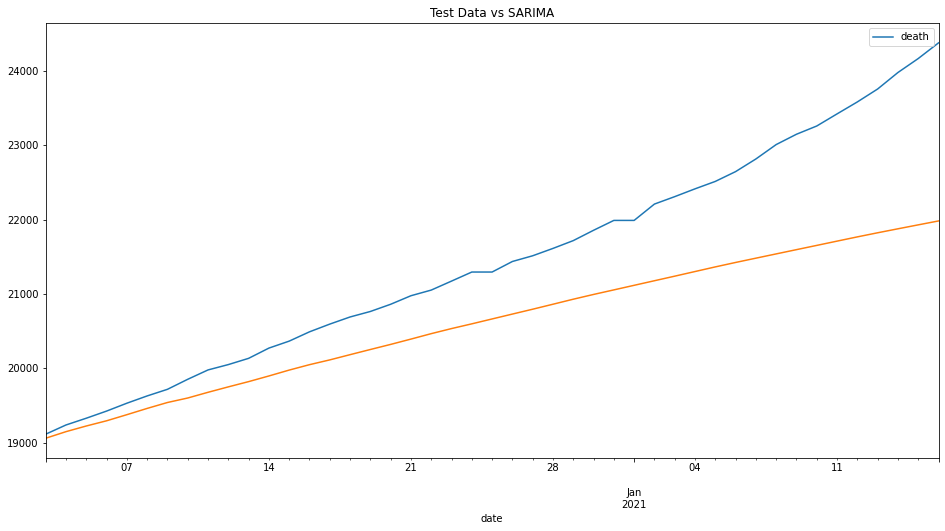

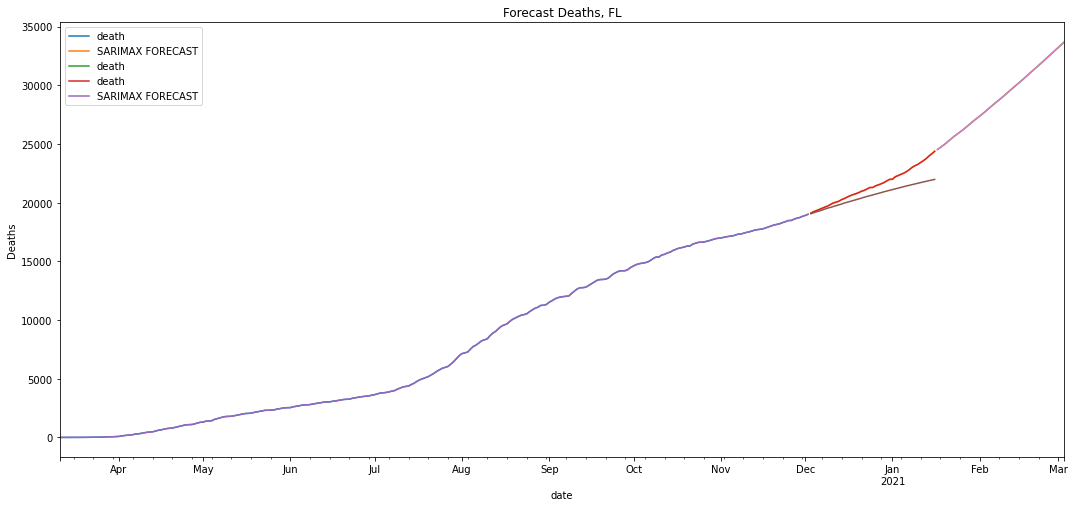

In [80]:
bsmod(df_states,'FL',arima_order)

#### New York State

In [81]:
cas(df_states,'NY')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  308
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -1653.565
Date:                Sat, 16 Jan 2021   AIC                           3319.130
Time:                        19:21:00   BIC                           3341.471
Sample:                             0   HQIC                          3328.065
                                - 308                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8241      0.058     31.240      0.000       1.710       1.939
ar.L2         -0.8827      0.053    -16.631      0.000      -0.987      -0.779
ma.L1         -2.4378      0.083    -29.209      0.0

(2, 2, 3)

In [82]:
arima_order = (2,2,3)

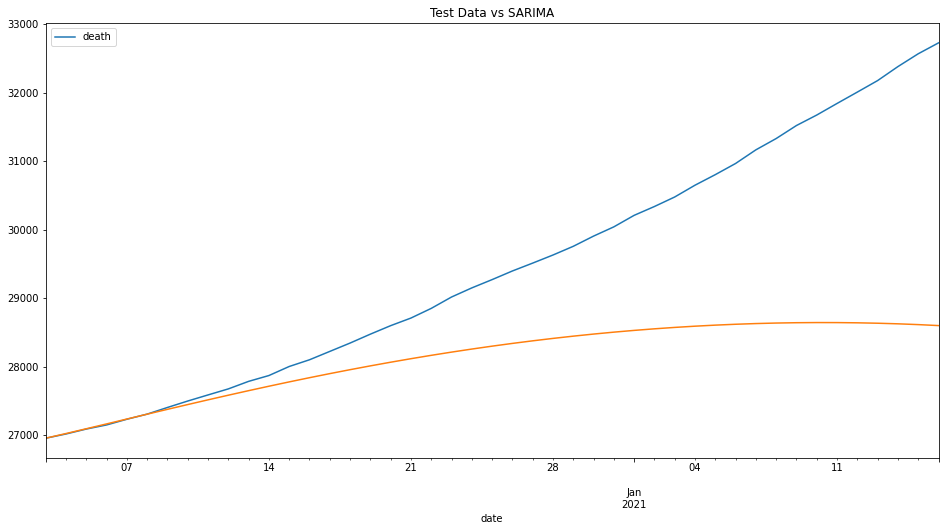

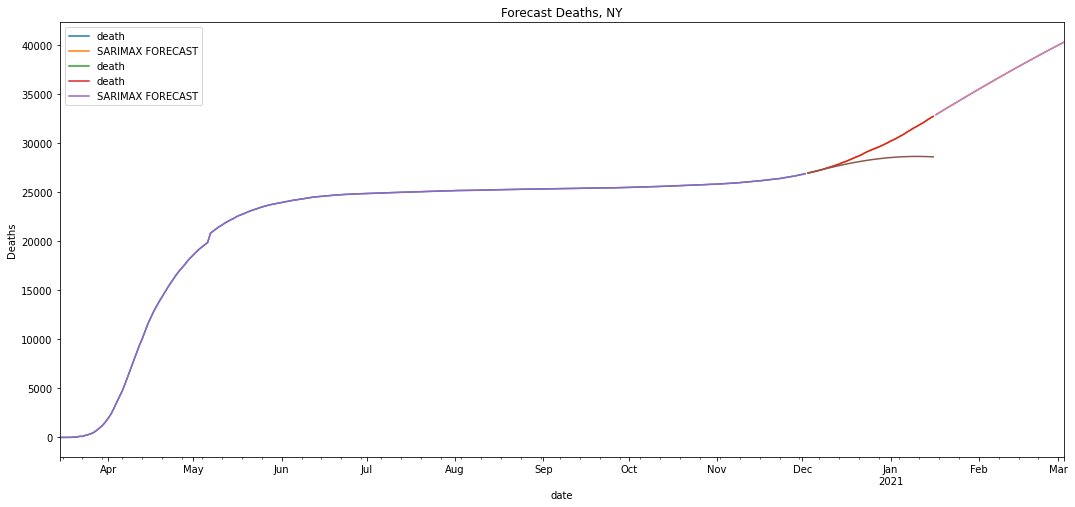

In [83]:
bsmod(df_states,'NY',arima_order)

#### California

In [84]:
cas(df_states,'CA')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  311
Model:               SARIMAX(6, 2, 0)   Log Likelihood               -1619.868
Date:                Sat, 16 Jan 2021   AIC                           3255.735
Time:                        19:21:06   BIC                           3285.602
Sample:                             0   HQIC                          3267.676
                                - 311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.2190      3.202      2.567      0.010       1.943      14.495
ar.L1         -0.5953      0.029    -20.671      0.000      -0.652      -0.539
ar.L2         -0.6495      0.038    -16.887      0.0

(6, 2, 0)

In [85]:
arima_order =(6,2,0)

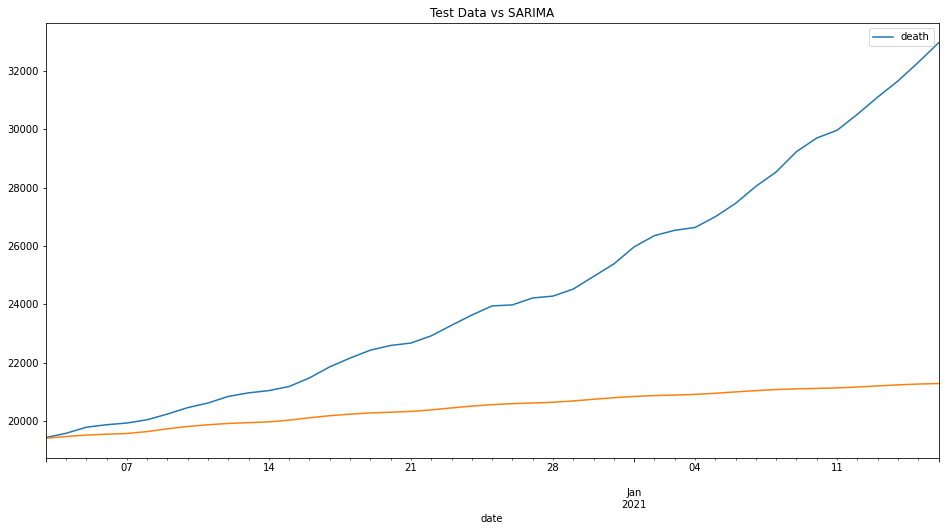

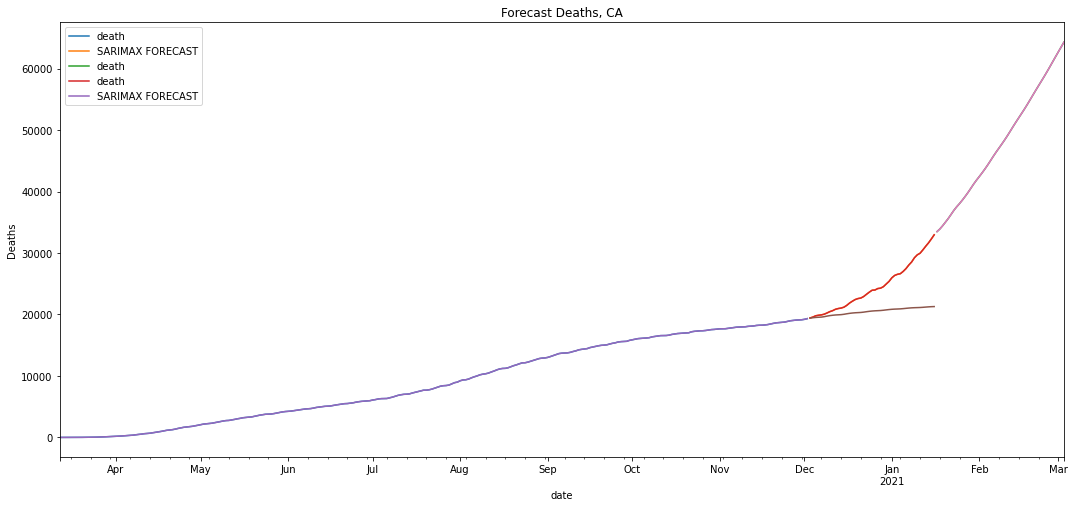

In [86]:
bsmod(df_states,'CA',arima_order)

### All States

In [87]:
casw(df_whole_US)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  342
Model:               SARIMAX(6, 2, 5)   Log Likelihood               -2337.594
Date:                Sat, 16 Jan 2021   AIC                           4701.188
Time:                        19:21:20   BIC                           4750.965
Sample:                             0   HQIC                          4721.022
                                - 342                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.9668     41.394      0.700      0.484     -52.163     110.097
ar.L1         -0.6190      0.142     -4.355      0.000      -0.898      -0.340
ar.L2         -0.8675      0.065    -13.410      0.0

(6, 2, 5)

In [88]:
arima_order = (6,2,5)

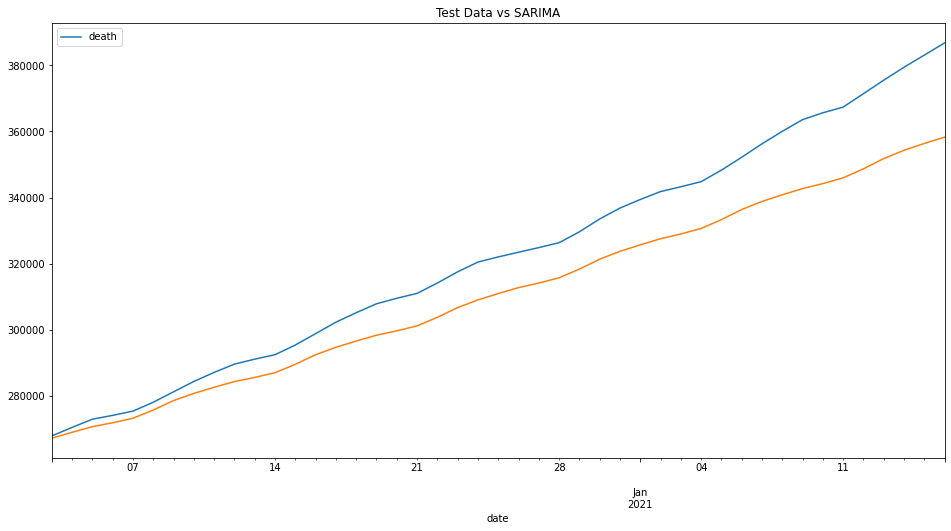

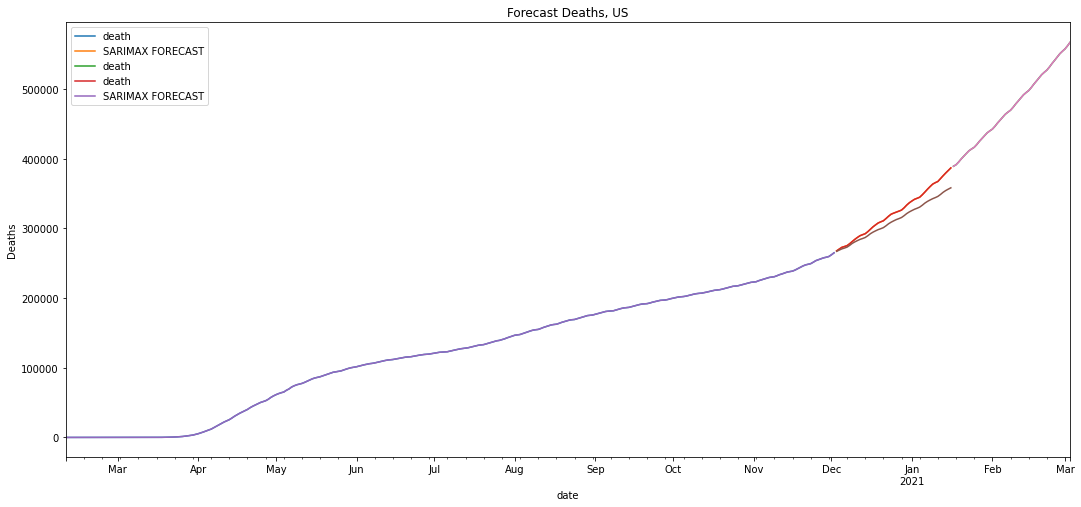

In [89]:
bsmodw(df_whole_US,arima_order)